# Метрические методы классификации

## Библиотеки

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


## Выборка данных

In [23]:
df = pd.read_csv('adultdataset/adult.csv',',')
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
del df['workclass']
del df['marital-status']
del df['education-num']
del df['occupation']
del df['relationship']
del df['race']
del df['sex']
del df['capital-gain']
del df['capital-loss']
del df['native-country']
df.head()

,age,fnlwgt,education,hours-per-week,income
0,50,83311,Bachelors,13,<=50K
1,38,215646,HS-grad,40,<=50K
2,53,234721,11th,40,<=50K
3,28,338409,Bachelors,40,<=50K
4,37,284582,Masters,40,<=50K


## Обработка данных

In [24]:
#Преобразование категориальных признаков в числовые
df.education.unique()
print(len(df.education.unique()))
le = LabelEncoder()
le.fit(df.education)
df['education'] = le.transform(df.education)
df.head()
# # Матричная диаграмма рассеивания
# sns.set_style("whitegrid")
# sns.pairplot(df, hue="income", height=3)
# plt.show()

16


,age,fnlwgt,education,hours-per-week,income
0,50,83311,9,13,<=50K
1,38,215646,11,40,<=50K
2,53,234721,1,40,<=50K
3,28,338409,9,40,<=50K
4,37,284582,12,40,<=50K


## Обработка отсутствующих данных

In [25]:
def countNaN(df)->int:
    c = 0
    for k,v in df.items():
        if str(df[k]).strip() == '?':
            c += 1
    all = df.count()
    if c == 0:
        return c
    return all/c

for col in df.columns:
    print('{} - {}%'.format(col,countNaN(df[col])))

age - 0%
fnlwgt - 0%
education - 0%
hours-per-week - 0%
income - 0%


## Обнаружение неинформативных признаков

In [26]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
    else:
        print("{} column It' ok!".format(col))

age column It' ok!
fnlwgt column It' ok!
education column It' ok!
hours-per-week column It' ok!
income column It' ok!


## Диаграммы для обнаружения выбросов

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

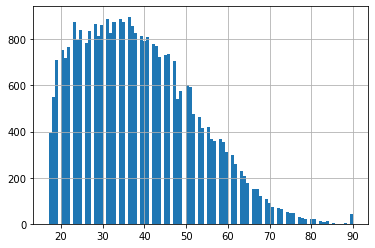

In [27]:
df['age'].hist(bins=100)
df['age'].describe()

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

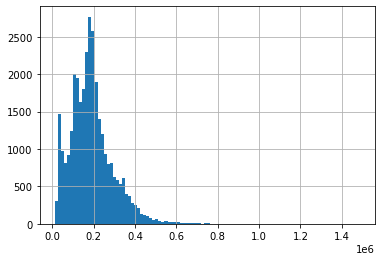

In [28]:
df['fnlwgt'].hist(bins=100)
df['fnlwgt'].describe()

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

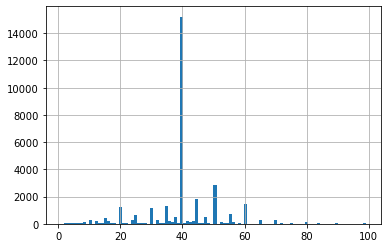

In [29]:
df['hours-per-week'].hist(bins=100)
df['hours-per-week'].describe()

## Удаление выбросов

In [30]:
copydf = df.copy()
countdfold = df.count()
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

copydf = remove_outlier(copydf,'age')
copydf = remove_outlier(copydf,'fnlwgt')
copydf = remove_outlier(copydf,'hours-per-week')

count    22748.000000
mean        38.841481
std         12.185529
min         17.000000
25%         29.000000
50%         38.000000
75%         47.000000
max         77.000000
Name: age, dtype: float64

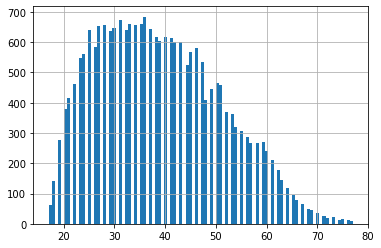

In [31]:
copydf['age'].hist(bins=100)
copydf['age'].describe()

count     22748.000000
mean     181256.910761
std       87083.590087
min       14878.000000
25%      117779.000000
50%      177073.500000
75%      230023.750000
max      416415.000000
Name: fnlwgt, dtype: float64

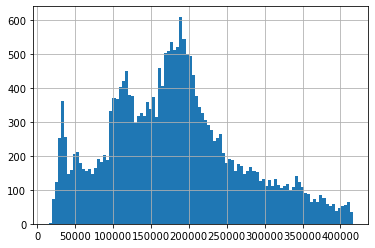

In [32]:
copydf['fnlwgt'].hist(bins=100)
copydf['fnlwgt'].describe()

count    22748.000000
mean        41.571743
std          4.019296
min         33.000000
25%         40.000000
50%         40.000000
75%         42.000000
max         52.000000
Name: hours-per-week, dtype: float64

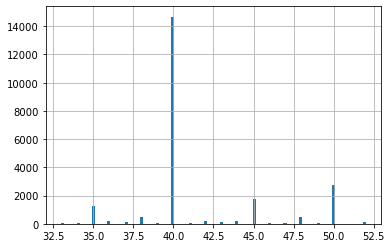

In [33]:
copydf['hours-per-week'].hist(bins=100)
copydf['hours-per-week'].describe()

In [34]:
print("Old data frames")
print(countdfold)
print("\nNew data frames")
copydf.count()

Old data frames
age               32560
fnlwgt            32560
education         32560
hours-per-week    32560
income            32560
dtype: int64

New data frames


age               22748
fnlwgt            22748
education         22748
hours-per-week    22748
income            22748
dtype: int64

## Нормализация признаков

In [35]:
scaler = StandardScaler()
X = copydf[['age','fnlwgt','education','hours-per-week']]
scaled_data = scaler.fit_transform(X)
scaled_data

array([[-0.06905725,  0.39490615,  0.17661426, -0.3910578 ],
       [ 1.16193813,  0.61395338, -2.54701206, -0.3910578 ],
       [-0.88972083,  1.80465164, -0.368111  , -0.3910578 ],
       ...,
       [ 0.09507547, -0.30870916,  0.17661426, -0.3910578 ],
       [ 1.57226992, -0.33700443,  0.17661426, -0.3910578 ],
       [ 1.07987177,  1.224943  ,  0.17661426, -0.3910578 ]])

## Средние значения признаков

In [36]:
middle = scaled_data.mean(axis=0)
print(middle)

[-1.91160609e-16  1.50398421e-16 -1.50866952e-16 -7.55271820e-16]


In [37]:
num_features = 4
X, Y = make_classification(n_samples=200, n_features=num_features,
                           n_informative=4, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=50,
                                                    random_state=0)
# copydf[:,:3] = scaler.fit_transform(copydf[:,:3])
X = pd.DataFrame(data = scaled_data)
Y = copydf.values[:, 4]
trainX, testX, trainY, testY = train_test_split( X, Y, test_size = 0.3)



## Метод ближайшего соседа

In [38]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)

Правильность на обучающей выборке : 1.00
Правильность на контрольной выборке : 0.94


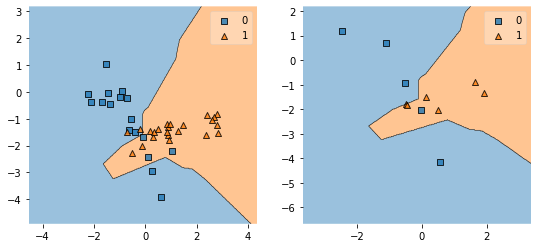

In [39]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))

feature_val = {1:middle[1],2:middle[2]}
width = 1
feature_width = {1:width,2:width}

plot_decision_regions(X_train, Y_train, model, ax=ax[0],feature_index=[0,3],
                      filler_feature_values= feature_val ,filler_feature_ranges= feature_width)
print("Правильность на обучающей выборке : {:.2f}".format(model.score(X_train,Y_train)))
plot_decision_regions(X_test, Y_test, model, ax=ax[1],feature_index=[0,3],
                      filler_feature_values= feature_val,filler_feature_ranges= feature_width)
print("Правильность на контрольной выборке : {:.2f}".format(model.score(X_test,Y_test)))
plt.show()

## Метод k-ближайших соседей

In [40]:
models = []
for n_neighbors in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)

Правильность на обучающей выборке : 0.89


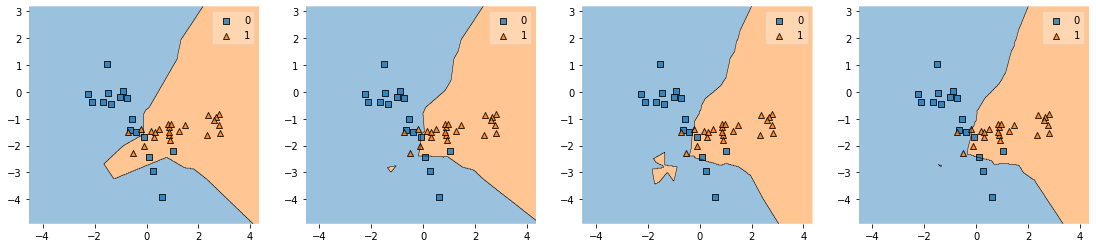

In [41]:

fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_train, Y_train, models[i], ax=ax[i],feature_index=[0,3],
                      filler_feature_values= feature_val,filler_feature_ranges= feature_width)
print("Правильность на обучающей выборке : {:.2f}".format(model.score(X_train,Y_train)))
plt.show()

Правильность на контрольной выборке : 0.86


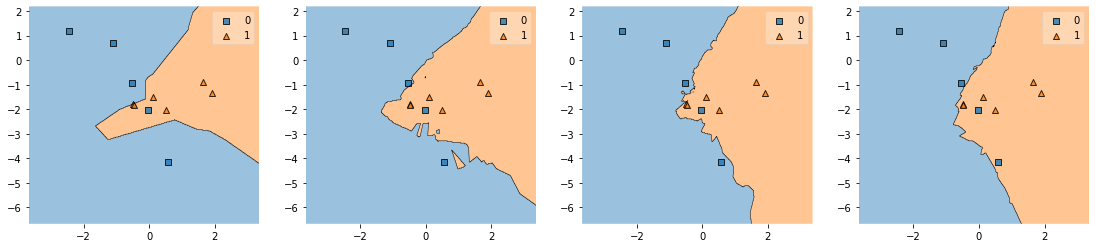

In [42]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i],feature_index=[0,3],
                      filler_feature_values= feature_val,filler_feature_ranges= feature_width)
print("Правильность на контрольной выборке : {:.2f}".format(models[46].score(X_test,Y_test)))
plt.show()

## Метод k-ближайших соседей с линейно убивающими весами

In [43]:
def func(distance):
    ret = np.ones_like(distance)
    k = ret.shape[1]
    for i in range(k):
        ret[:, i] *= (k-i)/k
    return ret

In [44]:
models = []
for n_neighbors in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=n_neighbors,
                                 weights=func)
    model.fit(X_train, Y_train)
    models.append(model)

Правильность на обучающей выборке : 0.89


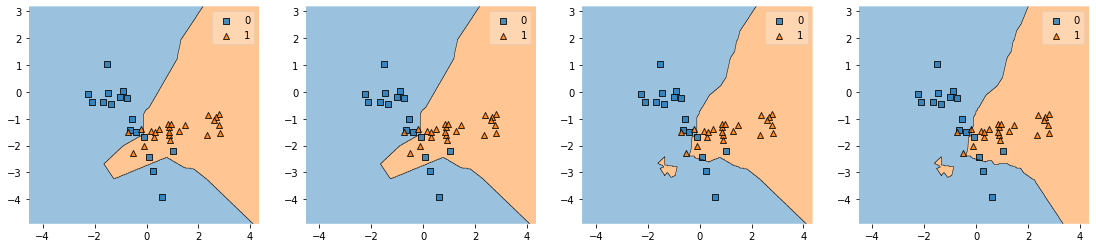

In [45]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_train, Y_train, models[i], ax=ax[i],feature_index=[0,3],
                      filler_feature_values= feature_val,filler_feature_ranges= feature_width)
print("Правильность на обучающей выборке : {:.2f}".format(model.score(X_train,Y_train)))
plt.show()

Правильность на контрольной выборке : 0.90


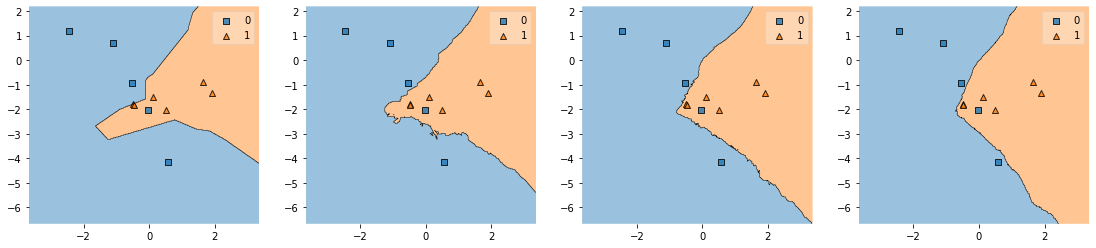

In [46]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[12*i], ax=ax[i],feature_index=[0,3],
                      filler_feature_values= feature_val,filler_feature_ranges= feature_width)
print("Правильность на контрольной выборке : {:.2f}".format(models[46].score(X_test,Y_test)))
plt.show()

## Метод окна Парзена

In [47]:
def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

/home/pda/anaconda3/envs/AdultResearch/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


Правильность на обучающей выборке : 1.00


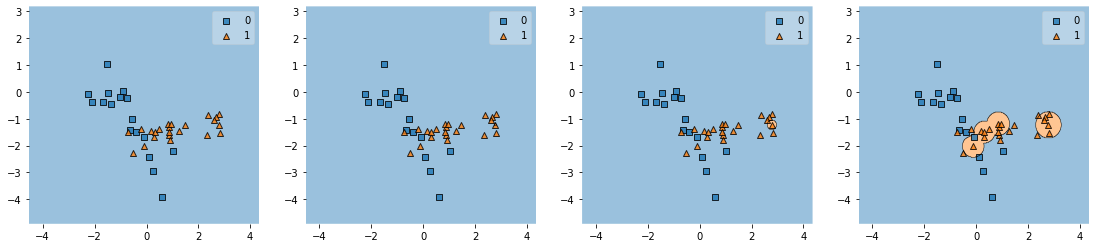

In [48]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.1, 0.2, 0.5]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_train, Y_train, model, ax=ax[i],feature_index=[0,3],
                      filler_feature_values= feature_val,filler_feature_ranges= feature_width)
print("Правильность на обучающей выборке : {:.2f}".format(model.score(X_train,Y_train)))


plt.show()

/home/pda/anaconda3/envs/AdultResearch/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


Правильность на обучающей выборке 0: 0.46
Правильность на обучающей выборке 1: 0.46
Правильность на обучающей выборке 2: 0.82
Правильность на обучающей выборке 3: 0.86


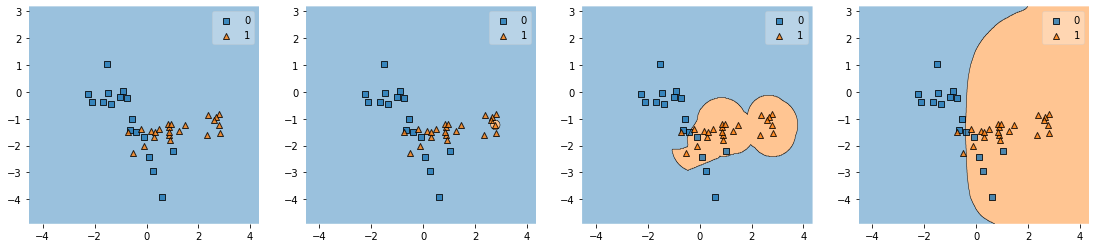

In [56]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i, h in enumerate([0.05, 0.2, 1.0, 4.5]):
    model = KNeighborsClassifier(n_neighbors=len(X_train),
                                 weights=lambda x: K(x, h=h))
    model.fit(X_train, Y_train)
    ax.append(fig.add_subplot(gs[i]))
    plot_decision_regions(X_train, Y_train, model, ax=ax[i],feature_index=[0,3],
                      filler_feature_values= feature_val,filler_feature_ranges= feature_width)
    print("Правильность на обучающей выборке {}: {:.2f}".format(i,model.score(X_test,Y_test)))

plt.show()